In [1]:
from matplotlib import patches
from scipy.spatial import ConvexHull

# !pip install brewer2mpl
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings; warnings.simplefilter('ignore')
sns.set_style("white")

from matplotlib.patches import Ellipse

n_colors = 7
colors = [plt.cm.tab10(i/float(n_colors-1)) for i in range(n_colors)]

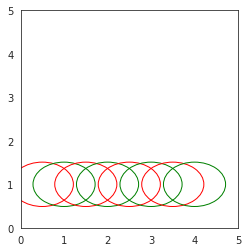

In [2]:
# def encircle(x,y, ax=None, **kw):
#     if not ax: ax=plt.gca()
#     p = np.c_[x,y]
#     hull = ConvexHull(p)
#     poly = plt.Polygon(p[hull.vertices,:], **kw)
#     ax.add_patch(poly)


fig = plt.figure(facecolor='w', edgecolor='k')    
# plt.close()
# plt.figure()
plt.gca().set_aspect('equal', adjustable='box')

ax = plt.gca()
# fig, ax = plt.subplots(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
ax.set(xlim=(0., 5.), ylim=(0., 5.))
n = 4

class EllipseRegion(object):
    """
    Represents the data .... while estimating the robot state.
    """
    def __init__(self, src, dest, e = 0.5, color = 'k'):
        '''inputs are focal points'''
        # # raise err shape = 2
        self.src = np.array(src)
        self.dest = np.array(dest)
        self.color = color

        delta = self.src - self.dest
        f = (delta[0]**2 + delta[1]**2)**0.5 + 1e-10
        # e = 0.9

        self.w = f / e
        self.h = (self.w**2 - f**2)**0.5
        # self.dim = (a, b)
        self.center = (self.src + self.dest) * 0.5 

    def draw_ellipse(self, ax=None, **kw):
        # if not ax: ax=plt.gca()

        # ellipse = Ellipse(xy=((x2 + x1) * 0.5, (y2 + y1) * 0.5), width=aax, height=bax, 
        # ellipse = Ellipse(xy=self.center, width=self.w, height=self.h, edgecolor='r', fc='None', lw=2)
        ellipse = Ellipse(xy=self.center, width=self.w, height=self.h, edgecolor = self.color, fc='None', **kw)
        ax.add_patch(ellipse)
        # p1 = np.c_[x1,y1]
        # p2 = np.c_[x2,y2]
# e = 0.7
poles = [EllipseRegion([i, 1.], [i+1., 1.], 0.7, color = "r") for i in range(n)]
poles2 = [EllipseRegion([i + 0.5, 1.], [i + 1.5, 1.], 0.7, color = "g") for i in range(n)]

# poles[0].draw_ellipse(ax)

# e = EllipseRegion([0., 0.], [0.+1., 0.])
# print(e.w, e.h, e.center)
# e.draw_ellipse(ax)

# poles = [np.c_[range(n), np.zeros(n)], np.c_[np.arange(1., n + 1.), np.zeros(n)]]
# poles += poles2

poles = np.c_[poles, poles2].ravel() # join in a, b, a, b, ... order

print(poles)

for pi in poles:
    # print(pi.src, pi.dest)
    pi.draw_ellipse(ax)
# plt.show()

# for pi in poles2:
#     # print(pi.src, pi.dest)
#     pi.draw_ellipse(ax, fc='None')


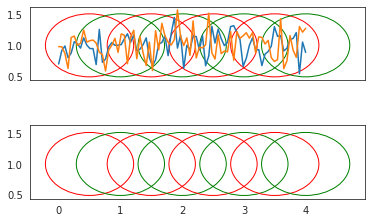

In [4]:
m = 80
x = np.linspace(0, 4, m)
eps = 0.2

n_trajs = 2
noise = [[1 + eps * np.random.randn(m)] for i in range(n_trajs)]

fig, ax = plt.subplots(2, 1, sharey = True, sharex = True, facecolor='w', edgecolor='k')    
ax[0].set_aspect('equal', adjustable='box')
ax[1].set_aspect('equal', adjustable='box')
# ax = plt.gca()

for i in range(n_trajs):
    ax[0].plot(x, np.array(noise[i]).squeeze())

for pi in poles:
    # print(pi.src, pi.dest)
    pi.draw_ellipse(ax[0])
    pi.draw_ellipse(ax[1])


# TODO::


In [ ]:
fig, ax = plt.subplots(2, 1, sharey = True, sharex = True, facecolor='w', edgecolor='k')    
ax[0].set_aspect('equal', adjustable='box')
ax[1].set_aspect('equal', adjustable='box')
# ax = plt.gca()

for i in range(n_trajs):
    ax[0].plot(x, np.array(noise[i]).squeeze())

for pi in poles:
    # print(pi.src, pi.dest)
    pi.draw_ellipse(ax[0])
    pi.draw_ellipse(ax[1])

st = np.c_[x, noise[0]]
l = [0.]

# algorithm of assigning the closest lm here (use KNN???)

# annealed? KNN, the neigbours are the locations and we assign the point to the closest location
prev = st[0]

def distance(state, ellipce_loc):
    assert isinstance(ellipce_loc, EllipseRegion)
    d1 = state - ellipce_loc.src
    d2 = state - ellipce_loc.dest
    return (d1**2 + d2**2)**0.5

for curr in st[1:]:
    ids = np.array([l[-1]] * 3) + [-1., 0., 1]
    if ids[2] >= len(poles):
        ids = ids[:2]
    dist = [distance(curr, li) for li in poles[ids]]
    l.append(ids[np.argmin(dist)])

ax[1].scatter(st[0, :], st[1, :], colors = [poles[li].color for li in l])

In [137]:
help(np.random.random)

Help on built-in function random:

random(...) method of numpy.random.mtrand.RandomState instance
    random(size=None)
    
    Return random floats in the half-open interval [0.0, 1.0). Alias for
    `random_sample` to ease forward-porting to the new random API.



In [134]:
a = [1, 2, 3]
b = [4, 5, 6]
np.c_[a, b].ravel()

array([1, 4, 2, 5, 3, 6])